In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задача 2

In [13]:
x1 = np.random.normal(0,1,(1000, 250))
x2 = np.random.uniform(-1,1,(1000, 50))
x = np.concatenate((x1, x2), axis = 1)
x.shape

(1000, 300)

In [14]:
mean = np.expand_dims(np.mean(x, axis = 1), axis=1)
std = np.expand_dims(np.std(x, axis=1), axis = 1)

In [15]:
ans = np.array([stats.anderson(xx) for xx in x])
ans.shape

(1000, 3)

Если статистика для конкретной выборки больше соотвествующего критического значения, то нулевая гипотеза может быть отвергнута

In [16]:
statistics = np.expand_dims(ans[:,0], axis = 1)
for i in range(5):
    print(ans[0][2][i],"%: ",np.count_nonzero(statistics>ans[:,1][0][i]))

15.0 %:  207
10.0 %:  142
5.0 %:  73
2.5 %:  31
1.0 %:  12


In [17]:
ans[1][2]

array([15. , 10. ,  5. ,  2.5,  1. ])

In [18]:
test = np.random.normal(10, 15, (1000, 300))
test_stats = np.array([stats.anderson(tt) for tt in test])[:,0]

In [19]:
pvalues = sorted(np.array([np.count_nonzero(st < test_stats) for st in statistics ])/len(test))

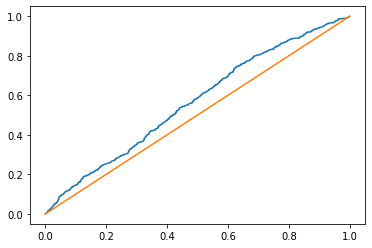

In [20]:
plt.plot(pvalues, np.arange(0, len(pvalues))/len(pvalues))
plt.plot([0,1], [0,1])
plt.show()

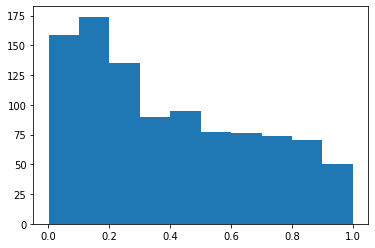

In [16]:
plt.hist(pvalues)
plt.show()

In [10]:
from skgof import ad_test

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/skgof/ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


In [21]:
result = sorted(np.array([ad_test(xx, stats.norm(np.mean(xx), np.std(xx))) for xx in x])[:,1])

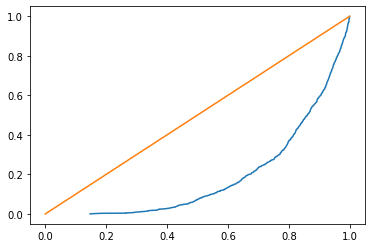

In [22]:
plt.plot(result, np.arange(0, len(result))/len(result))
plt.plot([0,1], [0,1])
plt.show()

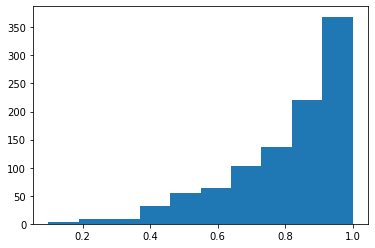

In [159]:
plt.hist(result)
plt.show()

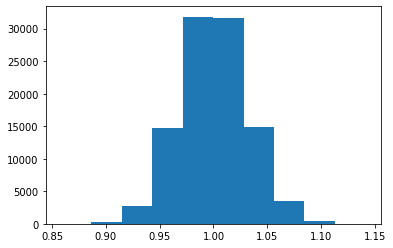

In [25]:
x = np.random.lognormal(0,1/32, 100000)
plt.hist(x)
plt.show()